In [85]:
%run 'header.ipynb'

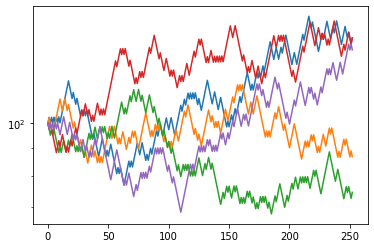

In [86]:
process_type = 'ubm'
Ns = 252
Nr = 10000
S0 = 100
mu = 0.06
sigma = 0.4

df = MC(process_type, Ns, Nr, S0 = S0, mu = mu, sigma = sigma, draw = 5, returned = 'psz')

In [87]:
df

,RunNum,StepNum,Price,Step,Z
0,0,0,100.000000,NaN,NaN
1,0,1,102.576198,0.025436,0.169928
2,0,2,100.047630,-0.024960,0.675549
3,0,3,102.625055,0.025436,0.136769
4,0,4,100.095283,-0.024960,0.728217
...,...,...,...,...,...
2529995,9999,248,57.943862,0.025436,0.087668
2529996,9999,249,59.436611,0.025436,0.204350
2529997,9999,250,60.967815,0.025436,0.195185
2529998,9999,251,59.464920,-0.024960,0.522430


In [111]:
final = df[df['StepNum'] == df['StepNum'].max()].copy()
final

,RunNum,StepNum,Price,Step,Z
252,0,252,143.673270,0.025436,0.145308
505,1,252,86.798482,-0.024960,0.753384
758,2,252,74.619610,0.025436,0.090411
1011,3,252,143.673270,0.025436,0.106610
1264,4,252,136.612234,-0.024960,0.690392
...,...,...,...,...,...
2528987,9995,252,60.996854,-0.024960,0.526722
2529240,9996,252,123.514181,0.025436,0.080835
2529493,9997,252,111.671938,-0.024960,0.554058
2529746,9998,252,91.284810,-0.024960,0.510581


In [112]:
final.mean()

RunNum     4999.500000
StepNum     252.000000
Price       114.431768
Step          0.000485
Z             0.499218
dtype: float64

In [113]:
final.std()

RunNum     2886.895680
StepNum       0.000000
Price        47.265774
Step          0.025198
Z             0.287825
dtype: float64

In [114]:
df.mean()

RunNum     4999.500000
StepNum     126.000000
Price       106.965515
Step          0.000221
Z             0.500331
dtype: float64

In [115]:
df.std()

RunNum     2886.751902
StepNum      73.034253
Price        32.130964
Step          0.025198
Z             0.288617
dtype: float64

11.6177

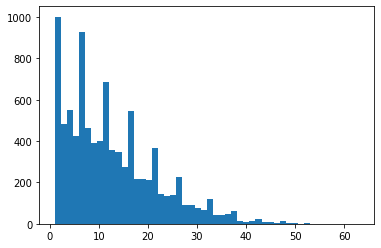

In [116]:
b = df.copy()
b['LastPrice'] = b.groupby(['RunNum'])['Price'].shift(1)
hit_p_run= b[(b['StepNum'] > 1) & ((b['Price'] >= S0) != (b['LastPrice'] >= S0))].groupby('RunNum')['Z'].count().values
plt.hist(hit_p_run, bins = 50)
hit_p_run.sum() / Nr

In [127]:
final['Payoff'] = final['Price'] - 100
final.loc[final['Payoff'] < 0, 'Payoff'] = 0
final['Payoff'].mean()

25.121168435839955

In [128]:
final['PutPayoff'] = 100 - final['Price']
final.loc[final['PutPayoff'] < 0, 'PutPayoff'] = 0
final['PutPayoff'].mean()

10.68940016458128